In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy as sp
import scipy.linalg as linalg
sp.init_printing(use_latex='mathjax')
import csv

In [125]:
class Controller2DSimulator:
    def __init__(self, Ts=0.1, GyroOffset=0, GyroStd=0):
        self.t = 0
        self.Ts = Ts
        self.GyroOffset = GyroOffset
        self.GyroStd = GyroStd
        
        self.amplitude_degree_per_second = 45
        self.frequency_Hz = .4
        
        self.phi = 0
        self.phi_dot = None
        
        self.runresult = list()
    
    def update_phi_dot(self):
        self.phi_dot = self.amplitude_degree_per_second * (np.sin(2*np.pi*self.frequency_Hz*self.t+np.pi/2))
        
    def update(self):
        self.update_phi_dot()
        self.phi += self.phi_dot * self.Ts
        self.t += self.Ts
    def measure(self):
        result = dict()
        result['time'] = self.t
        result['GT_PhiY'] = self.phi
        result['GT_Flex6'] = self.phi*10/9  + 700
        result['GT_PhiYdot'] = self.phi_dot
        
        result['GT_GyroY'] = self.phi_dot + self.GyroOffset
        
        result['GyroY'] = result['GT_GyroY'] + np.random.randn()*self.GyroStd
        result['PhiY'] = self.phi + np.random.randn()*5
        result['Flex6'] = (self.phi + np.random.randn()*5) *10/9  + 700
        return result
    def run(self, T=5):
        result = list()
        T = self.t+T
        while(self.t < T):
            self.update()
            result.append(self.measure())
        self.runresult += result
        return pd.DataFrame(self.runresult)

## Beispielhafte Verwendung

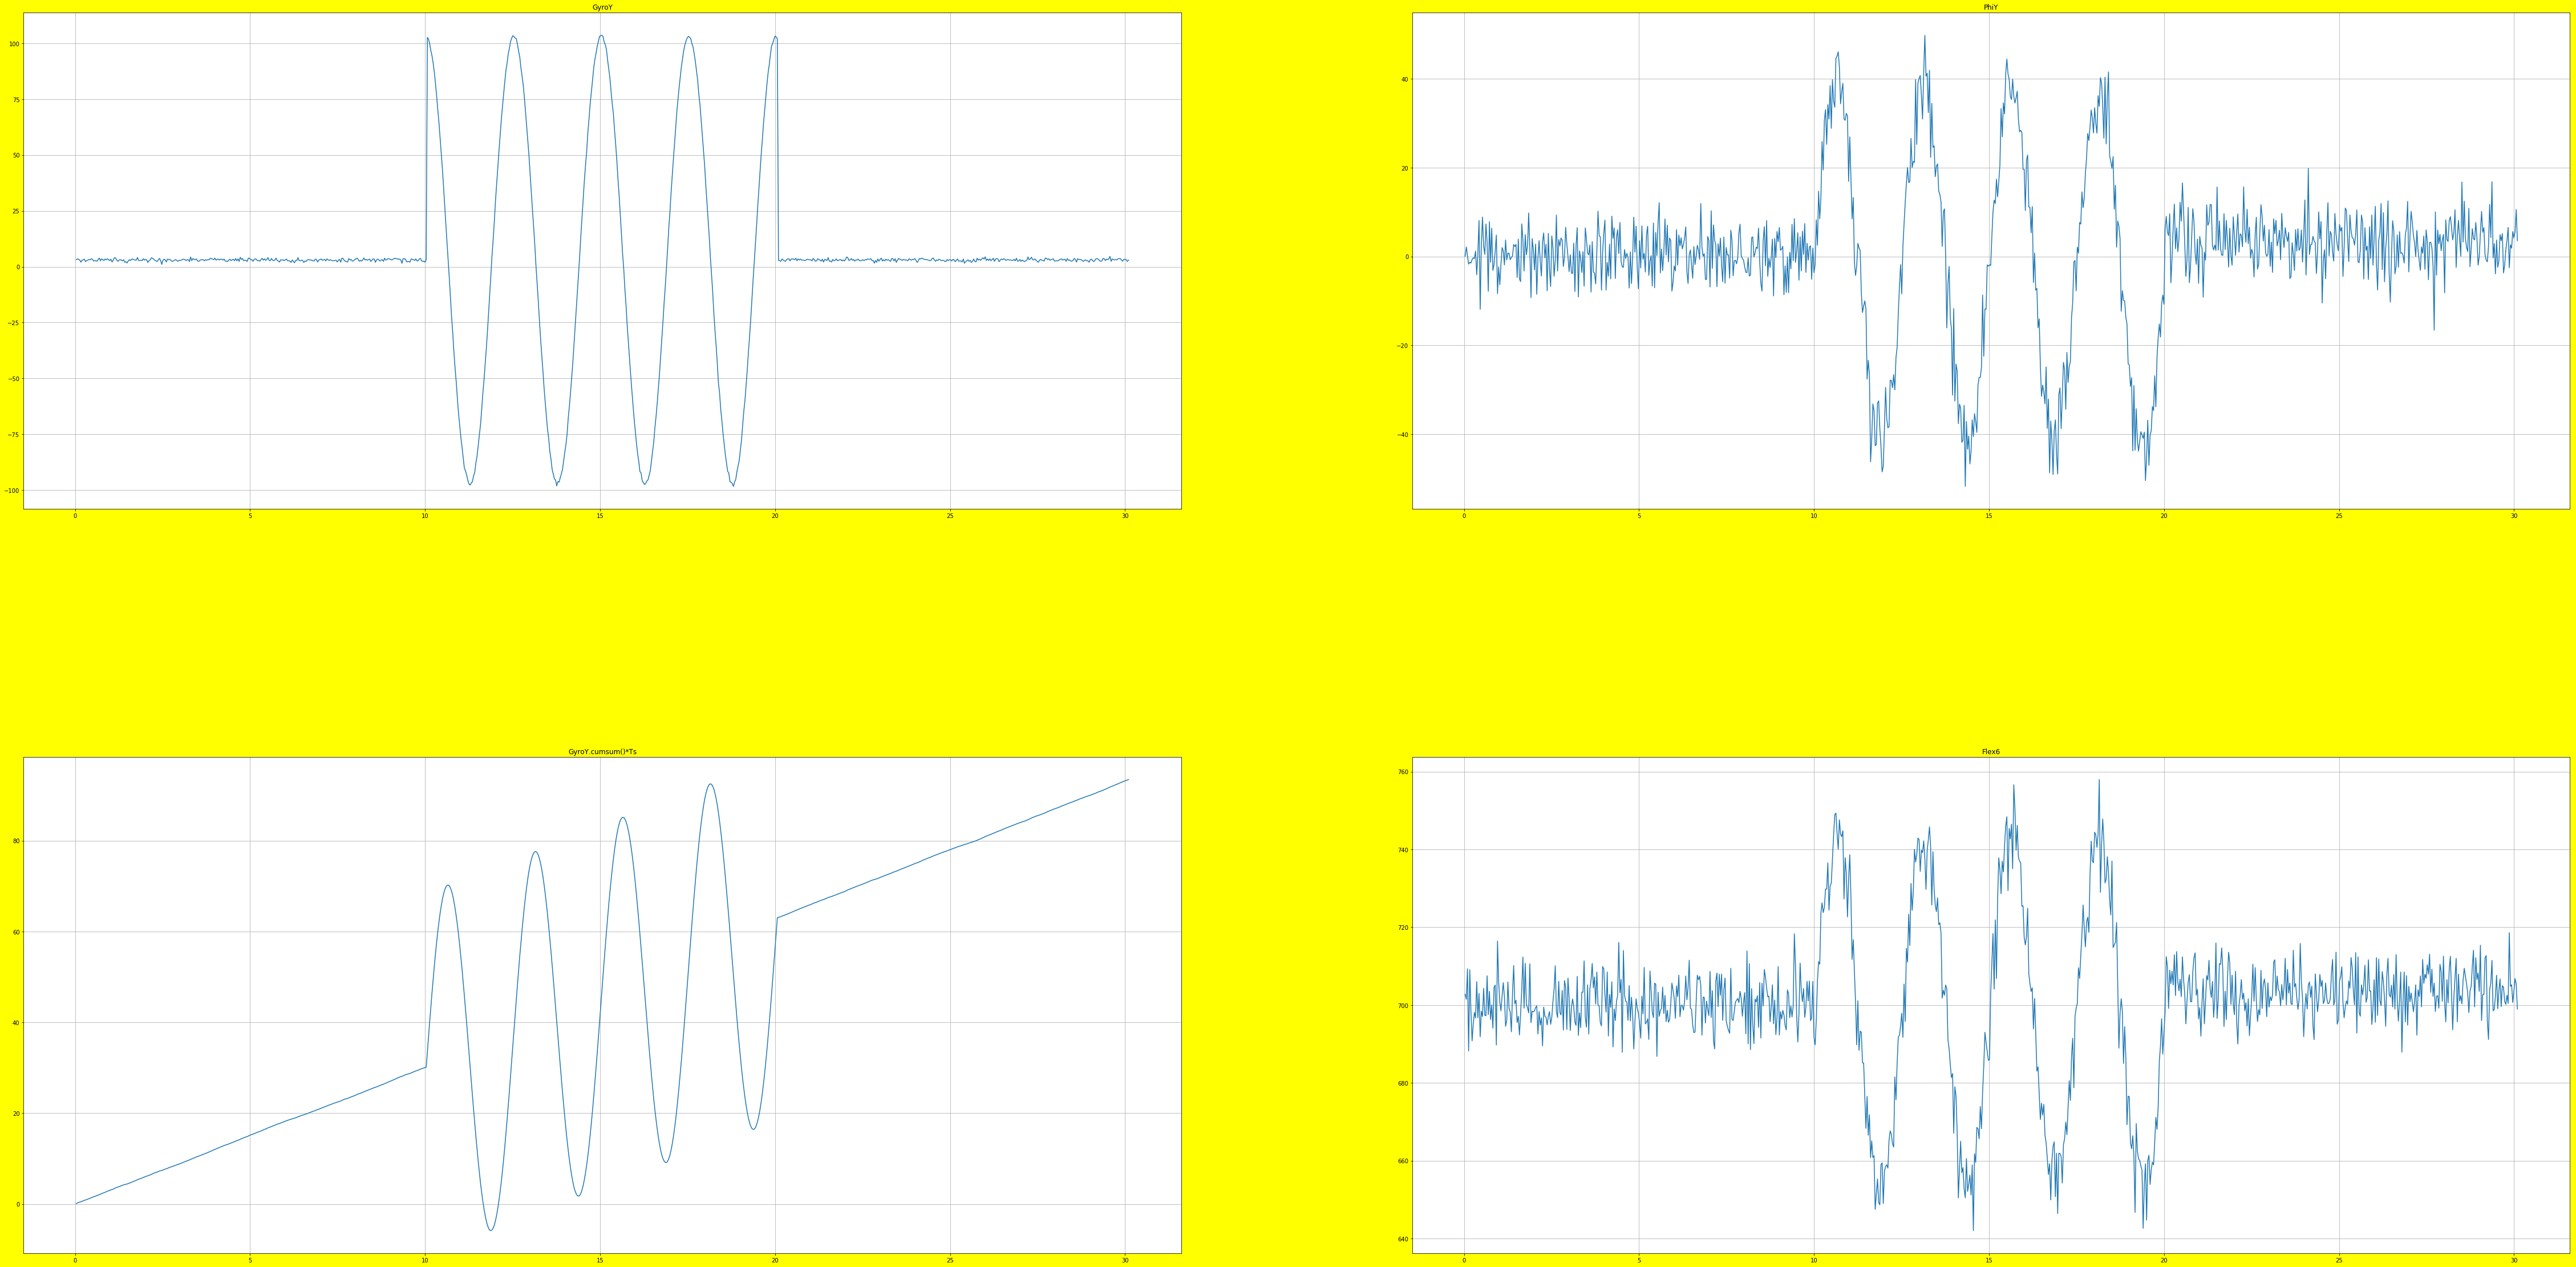

In [127]:
Ts = 0.033
sim = Controller2DSimulator(Ts=Ts, 
                            GyroOffset=3, GyroStd=.5)

sim.amplitude_degree_per_second = 0; data = sim.run(10)
sim.amplitude_degree_per_second = 100; data = sim.run(10)
sim.amplitude_degree_per_second = 0; data = sim.run(10)

with open('Simulationsdaten.csv', 'w') as csvfile:
            fieldnames = ['time', 'Flex6', 'GyroY']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames, delimiter=";")

            print()
            writer.writeheader()
            for n in range(len(data)):
                writer.writerow({'time':data.time[n], 'Flex6': data.PhiY[n], 'GyroY': data.GyroY[n]})
                

plt.figure(figsize=(80, 40), facecolor='yellow')
plt.subplot(2, 2, 1);      plt.title('GyroY'); plt.plot(data.time, data.GyroY); plt.grid()
plt.subplot(2, 2, 3);      plt.title('GyroY.cumsum()*Ts'); plt.plot(data.time, data.GyroY.cumsum()*Ts); plt.grid()
plt.subplot(2, 2, 2);      plt.title('PhiY'); plt.plot(data.time, data.PhiY); plt.grid()
plt.subplot(2, 2, 4);      plt.title('Flex6'); plt.plot(data.time, data.Flex6); plt.grid()
plt.subplots_adjust(hspace=.5)